In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")
df.drop('state', axis=1, inplace=True)

In [4]:
df.head()

,date,cases,deaths
0,25.01.20,1,0
1,26.01.20,1,0
2,27.01.20,0,0
3,28.01.20,0,0
4,29.01.20,0,0


In [7]:
df['month'] = pd.to_datetime(df['date'], format='%d.%m.%y').dt.month_name()
df.head()

,date,cases,deaths,month
0,25.01.20,1,0,January
1,26.01.20,1,0,January
2,27.01.20,0,0,January
3,28.01.20,0,0,January
4,29.01.20,0,0,January


# [pandas.Series.dt.month_name](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month_name.html)

# Problem 1

Weekdays

You continue working with the COVID dataset for California.
Now, add the weekday names for each row as a new column, named 'weekday'.
Then, output the last 7 days data of the dataset.
Do not set any index on the DataFrame.

The given code converts the date column to datetime, so you do not need to change its format.
Use the .dt.strftime("%A") function on the date column to convert it into a weekday name.

In [10]:
import pandas as pd

df = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")

df.drop('state', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%y")
df.head()

,date,cases,deaths
0,2020-01-25,1,0
1,2020-01-26,1,0
2,2020-01-27,0,0
3,2020-01-28,0,0
4,2020-01-29,0,0


In [14]:
df['weekday'] = df['date'].dt.strftime('%A')
df.tail(7)

,date,cases,deaths,weekday
335,2020-12-25,16772,20,Friday
336,2020-12-26,64987,257,Saturday
337,2020-12-27,37555,62,Sunday
338,2020-12-28,41720,246,Monday
339,2020-12-29,34166,425,Tuesday
340,2020-12-30,32386,437,Wednesday
341,2020-12-31,32264,574,Thursday


### Grouping

In [15]:
import pandas as pd

df = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")

df.drop('state', axis=1, inplace=True)
df['month'] = pd.to_datetime(df['date'], format="%d.%m.%y").dt.month_name()
df.set_index('date', inplace=True)

print(df['month'].value_counts())

March        31
May          31
July         31
August       31
October      31
December     31
April        30
June         30
September    30
November     30
February     29
January       7
Name: month, dtype: int64


In [16]:
df.groupby('month')['cases'].sum()

month
April          41887
August        210268
December     1070577
February          25
January            3
July          270120
June          119039
March           8555
May            62644
November      301944
October       114123
September     108584
Name: cases, dtype: int64

In [17]:
df['cases'].sum()

2307769

In [19]:
df['deaths'].sum()

25965

# Problem 2

Worst Day

Given the COVID data, find the day with maximum cases in a given month.
Take a month name as input and output the row that corresponds to the day with the maximum number of cases in that month.

You can filter the DataFrame for the given month first, and then select the row with the maximum cases.
Important: The output should be a DataFrame, which includes all the columns.
For example, for the month of February, the expected result would be:
    
cases deaths month
date
2020-02-26 15 0 February

The given code adds a month column to the dataset, and adds an index. Do not change that part of the code.

In [30]:
import pandas as pd

covid = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")

covid.drop('state', axis=1, inplace=True)
covid['date'] = pd.to_datetime(covid['date'], format="%d.%m.%y")
covid['month'] = covid['date'].dt.month_name()
covid.set_index('date', inplace=True)

In [31]:
covid.head()

,cases,deaths,month
date,,,
2020-01-25,1,0,January
2020-01-26,1,0,January
2020-01-27,0,0,January
2020-01-28,0,0,January
2020-01-29,0,0,January


In [32]:
month = input()
data = df[df['month'] == month]
data.head()

April


,cases,deaths,month
date,,,
2020-04-01,1274,28,April
2020-04-02,1333,35,April
2020-04-03,1379,35,April
2020-04-04,1227,41,April
2020-04-05,1406,28,April


In [34]:
case = data['cases'].max()
case

2334

In [36]:
result = data[data['cases'] == case]
result

,cases,deaths,month
date,,,
2020-04-29,2334,77,April


# Problem 3

COVID Data Analysis

You are working with the COVID dataset for California, which includes the number of cases and deaths for each day of 2020.
Find the day when the deaths/cases ratio was largest.

To do this, you need to first calculate the deaths/cases ratio and add it as a column to the DataFrame with the name 'ratio', then find the row that corresponds to the largest value.

Important: The output should be a DataFrame, containing all of the columns of the dataset for the corresponding row.

In [37]:
import pandas as pd

covid_2020 = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")

covid_2020.drop('state', axis=1, inplace=True)
covid_2020.set_index('date', inplace=True)

In [38]:
covid_2020.head()

,cases,deaths
date,,
25.01.20,1,0
26.01.20,1,0
27.01.20,0,0
28.01.20,0,0
29.01.20,0,0


In [39]:
# eliminate datas with 0 cases
covid_2020 = covid_2020[covid_2020['cases'] > 0]
covid_2020.head()

,cases,deaths
date,,
25.01.20,1,0
26.01.20,1,0
31.01.20,1,0
02.02.20,3,0
10.02.20,1,0


In [41]:
covid_2020['ratio'] = covid_2020.deaths / covid_2020.cases
covid_2020

,cases,deaths,ratio
date,,,
25.01.20,1,0,0.000000
26.01.20,1,0,0.000000
31.01.20,1,0,0.000000
02.02.20,3,0,0.000000
10.02.20,1,0,0.000000
...,...,...,...
27.12.20,37555,62,0.001651
28.12.20,41720,246,0.005896
29.12.20,34166,425,0.012439


In [47]:
result = covid_2020[covid_2020.ratio == covid_2020['ratio'].max()]
result

,cases,deaths,ratio
date,,,
10.03.20,7,1,0.142857


In [46]:
covid_2020.ratio.max()

0.14285714285714285

# Matplotlib

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.set(rc={'figure.figsize': (9, 6)})

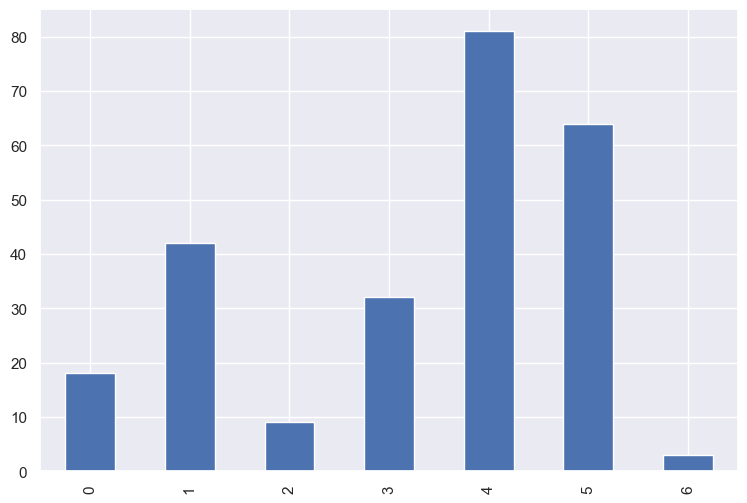

In [55]:
s = pd.Series([18, 42, 9, 32, 81, 64, 3])
s.plot(kind='bar')
plt.savefig('plot.png');

In [73]:
df = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")
df.drop('state', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%y")
df['month'] = df['date'].dt.month
df.set_index('date', inplace=True)
df

,cases,deaths,month
date,,,
2020-01-25,1,0,1
2020-01-26,1,0,1
2020-01-27,0,0,1
2020-01-28,0,0,1
2020-01-29,0,0,1
...,...,...,...
2020-12-27,37555,62,12
2020-12-28,41720,246,12
2020-12-29,34166,425,12


# [pandas.DataFrame.set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)

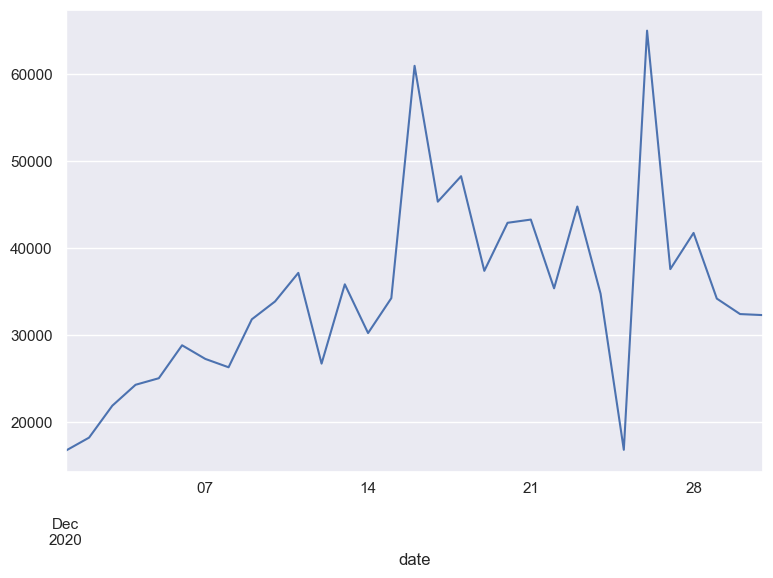

In [75]:
df[df['month'] == 12]['cases'].plot();

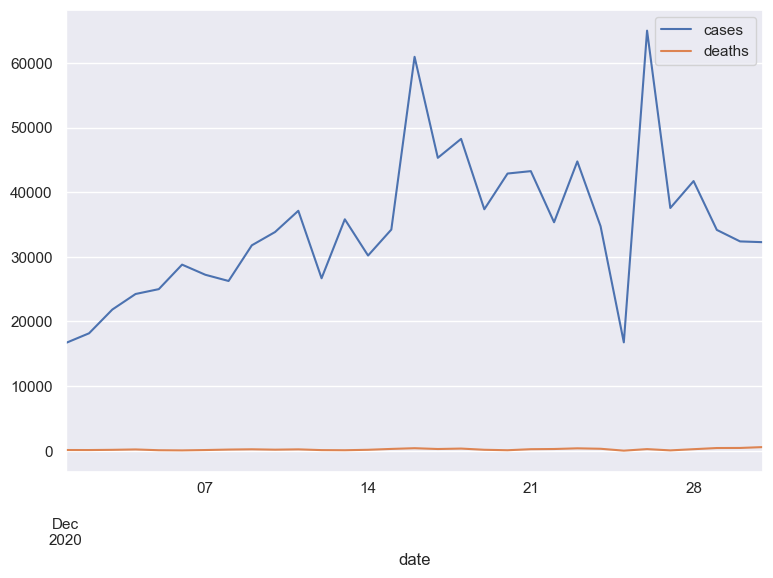

In [77]:
df[df['month'] == 12][['cases', 'deaths']].plot();

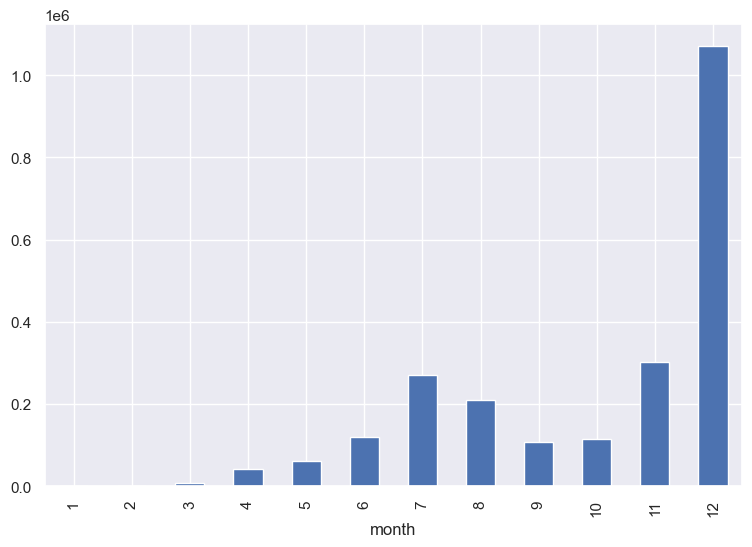

In [78]:
df.groupby('month')['cases'].sum().plot(kind='bar');

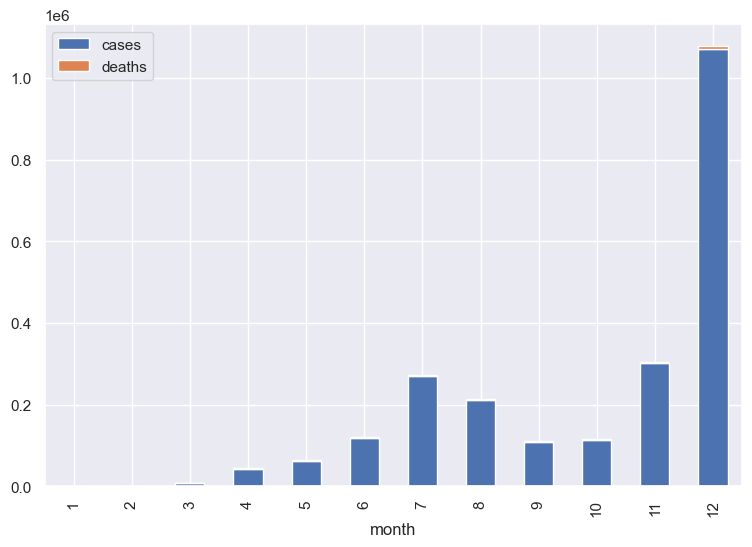

In [81]:
df.groupby('month')[['cases', 'deaths']].sum().plot(kind='bar', stacked=True);

### groupby used when we work 'with each'

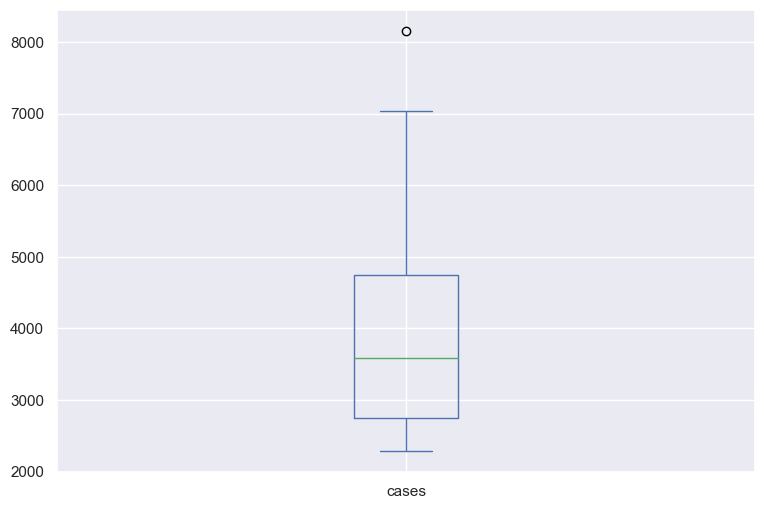

In [83]:
df[df['month'] == 6]['cases'].plot(kind='box');

### Histograms show the distribution of data. Histograms display frequencies for a group of data

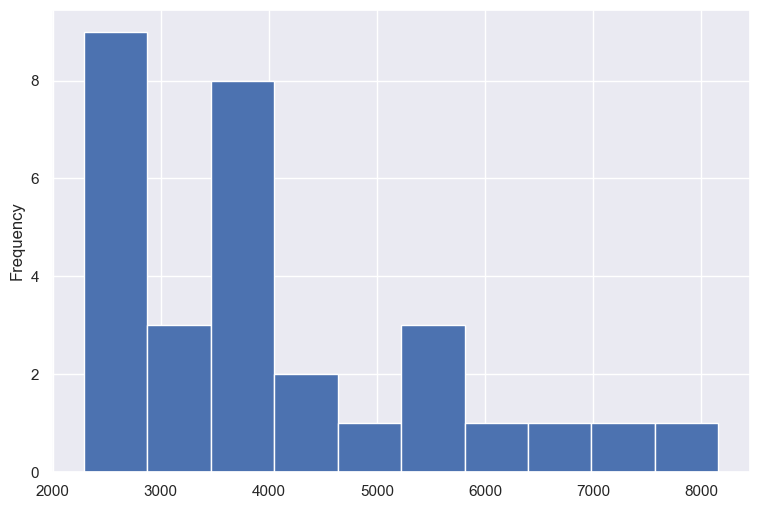

In [88]:
df[df['month'] == 6]['cases'].plot(kind='hist', bins=10);

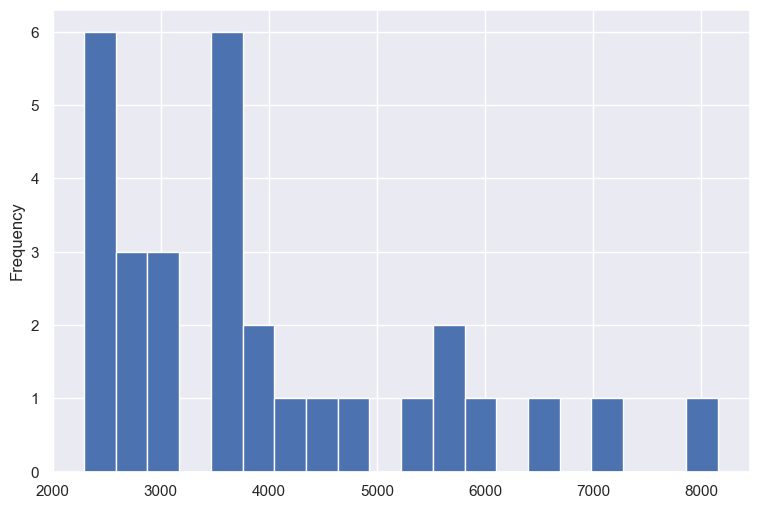

In [86]:
df[df['month'] == 6]['cases'].plot(kind='hist', bins=20);

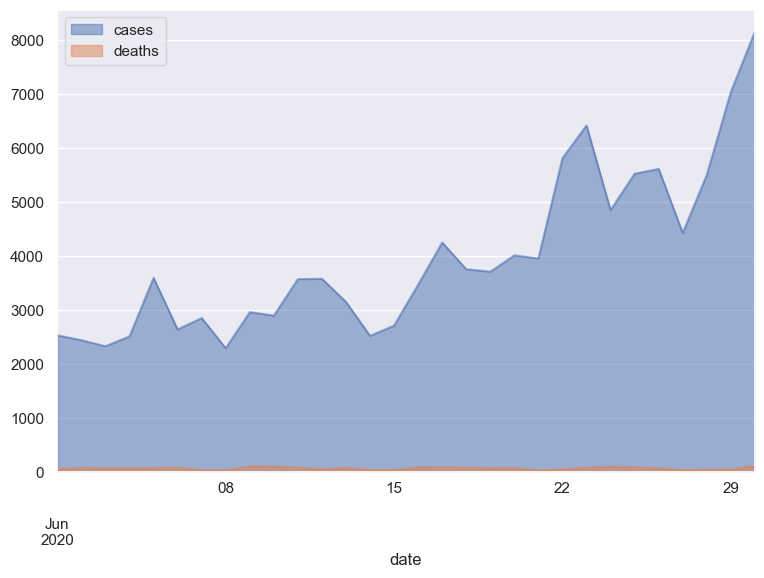

In [90]:
df[df['month'] == 6][['cases', 'deaths']].plot(kind='area', stacked=False);

# [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

### A scatter plot is used to show the relationship between two variables.

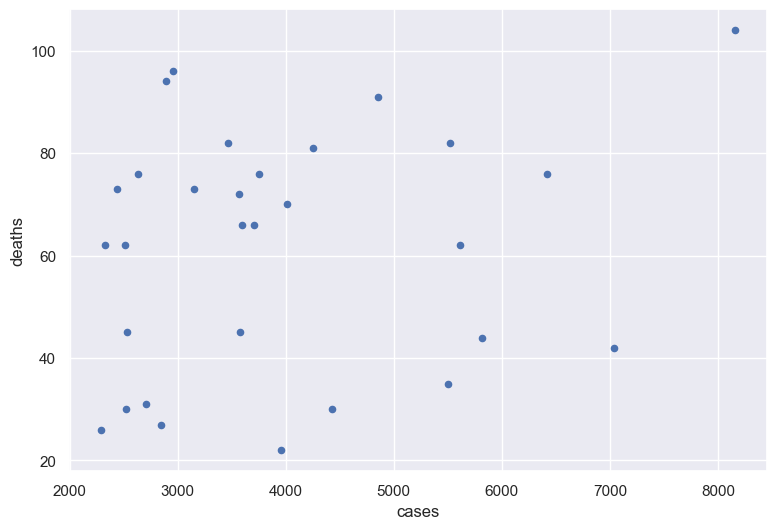

In [91]:
df[df.month == 6][['cases', 'deaths']].plot(kind='scatter', x='cases', y='deaths');

Pie charts are generally used to show percentage or proportional data.

Pie charts are usually used when you have up to 6 categories.

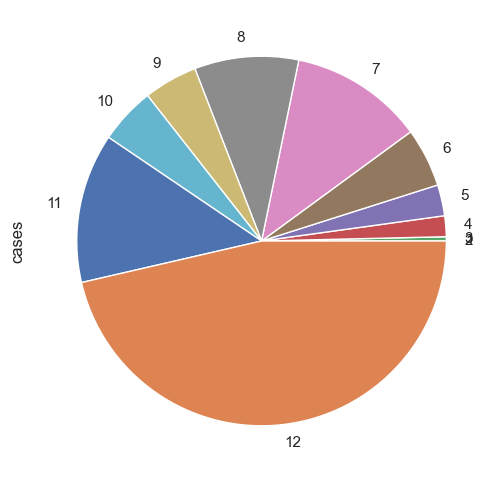

In [98]:
df.groupby('month')['cases'].sum().plot(kind='pie');

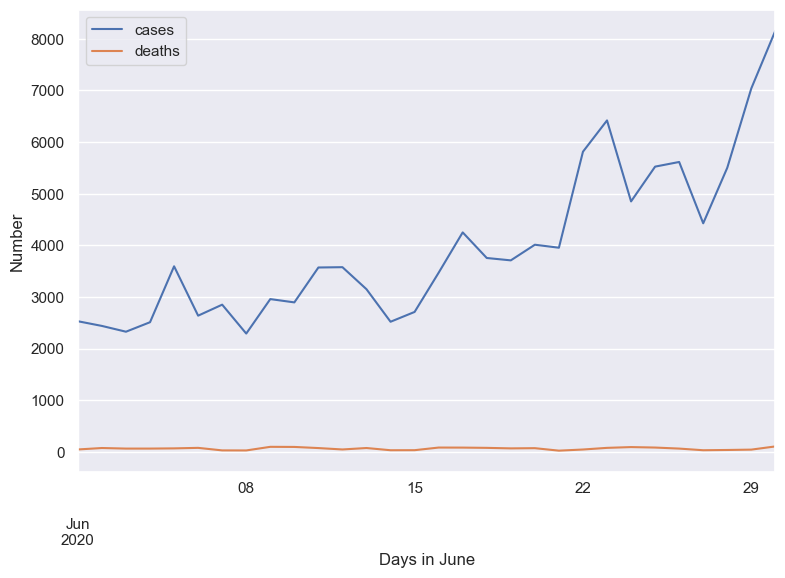

In [102]:
june = df[df.month == 6]
june[['cases', 'deaths']].plot(kind='line', legend=True)
plt.xlabel('Days in June')
plt.ylabel('Number');

### By default, pandas select the index name as xlabel, while leaving it empty for ylabel.

# [matplotlib.pyplot.suptitle](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)

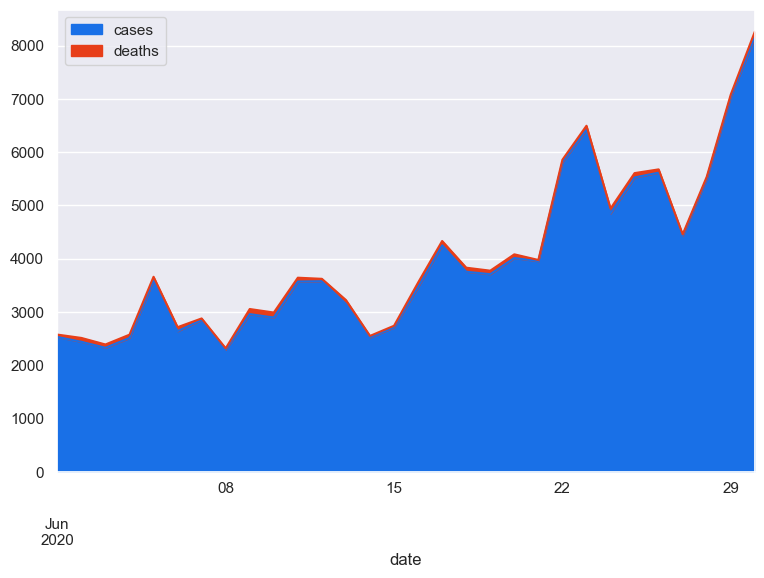

In [103]:
june[['cases', 'deaths']].plot(kind='area', color=['#1970E7', '#E73E19']);

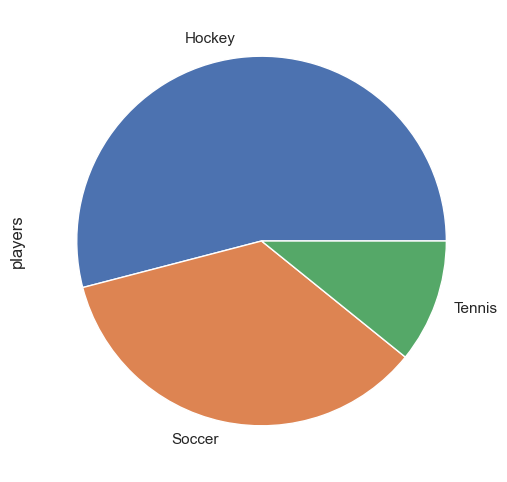

In [105]:
data = {
    'sport': ["Soccer", "Tennis", "Soccer", "Hockey"],
    'players': [5, 4, 8, 20]
}
df = pd.DataFrame(data)
df.groupby('sport')['players'].sum().plot(kind='pie');

# [pandas.DataFrame.plot.barh](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html)